In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
%precision 4
import os, sys, glob

In [2]:
from scipy.stats import ttest_ind as t
import matplotlib.colors as mcolors

Change of Basis
====

Variance and covariance
----

Remember the formula for covariance

$$
\text{Cov}(X, Y) = \frac{\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})}{n-1}
$$

where $\text{Cov}(X, X)$ is the sample variance of $X$.

In [3]:
def cov(x, y):
    """Returns coaraiance of vectors x and y)."""
    xbar = x.mean()
    ybar = y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

In [4]:
X = np.random.random(10)
Y = np.random.random(10)

In [5]:
np.array([[cov(X, X), cov(X, Y)], [cov(Y, X), cov(Y,Y)]])

array([[ 0.0727, -0.0092],
       [-0.0092,  0.0798]])

In [6]:
# This can of course be calculated using numpy's built in cov() function
np.cov(X, Y)

array([[ 0.0727, -0.0092],
       [-0.0092,  0.0798]])

In [7]:
# Extension to more vairables is done in a pair-wise way
Z = np.random.random(10)
np.cov([X, Y, Z])

array([[ 0.0727, -0.0092,  0.0383],
       [-0.0092,  0.0798, -0.0299],
       [ 0.0383, -0.0299,  0.0541]])

Eigendecomposition of the covariance matrix
----

In [8]:
mu = [0,0]
sigma = [[0.6,0.2],[0.2,0.2]]
n = 1000
x = np.random.multivariate_normal(mu, sigma, n).T

In [9]:
A = np.cov(x)

In [10]:
m = np.array([[1,2,3],[6,5,4]])
ms = m - m.mean(1).reshape(2,1)
np.dot(ms, ms.T)/2

array([[ 1., -1.],
       [-1.,  1.]])

In [11]:
e, v = np.linalg.eig(A)

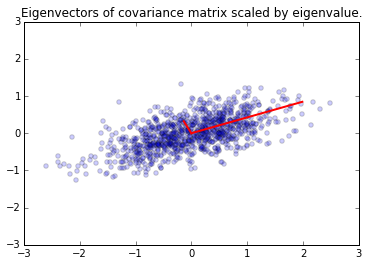

In [12]:
plt.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e, v.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3])
plt.title('Eigenvectors of covariance matrix scaled by eigenvalue.');

PCA
----

Principal Components Analysis (PCA) basically means to find and rank all the eigenvalues and eigenvectors of a covariance matrix. This is useful because high-dimensional data (with $p$ features) may have nearly all their variation in a small number of dimensions $k$, i.e. in the subspace spanned by the eigenvectors of the covariance matrix that have the $k$ largest eigenvalues. If we project the original data into this subspace, we can have a dimension reduction (from $p$ to $k$) with hopefully little loss of information.

Numerically, PCA is typically done using SVD on the data matrix rather than eigendecomposition on the covariance matrix. The next section explains why this works.

### Data matrices that have zero mean for all feature vectors

\begin{align}
\text{Cov}(X, Y) &= \frac{\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})}{n-1} \\
  &= \frac{\sum_{i=1}^nX_iY_i}{n-1} \\
  &= \frac{XY^T}{n-1}
\end{align}

and so the covariance matrix for a data set X that has zero mean in each feature vector is just $XX^T/(n-1)$. 

In other words, we can also get the eigendecomposition of the covariance matrix from the positive semi-definite matrix $XX^T$.

In [13]:
e1, v1 = np.linalg.eig(np.dot(x, x.T)/(n-1))

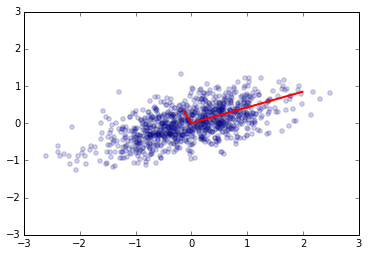

In [14]:
plt.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e1, v1.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

Change of basis via PCA
----

### We can transform the original data set so that the eigenvectors are the basis vectors amd find the new coordinates of the data points with respect to this new basis

This is the change of basis transformation covered in the Linear Alegebra module. First, note that the covariance matrix is a real symmetric matrix, and so the eigenvector matrix is an orthogonal matrix. 

In [15]:
e, v = np.linalg.eig(np.cov(x))
v.dot(v.T)

array([[ 1.,  0.],
       [ 0.,  1.]])

### Linear algebra review for change of basis

Let's consider two different sets of basis vectors $B$ and $B'$ for $\mathbb{R}^2$.  Suppose the basis vectors for $B$ are ${u, v}$ and that the basis vectors for $B'$ are ${u', v'}$. Suppose also that the basis vectors ${u', v'}$ for $B'$ have coordinates $u' = (a, b)$ and $v' = (c, d)$ with respect to $B$. That is, $u' = au + bv$ and $v' = cu + dv$ since that's what vector coordinates mean. 

Suppose we want to find out what the coordinates of a vector $w = (x', y')$ in the $B'$ basis would be in $B$. We do some algebra:

\begin{align}
w' &= x'u' + y'v' \\
&= x'(au + bv) + y'(cu + dv) \\
&= (ax' + cy')u + (bx' + dy')v
\end{align}

So

\begin{align}
[w]_B =
\left( \begin{array}{cc}
ax' + cy' \\
bx' + dy' 
\end{array} \right)
\end{align}

Expressing in matrix form
\begin{align}
[w]_B =
\left( \begin{array}{cc}
a & c \\
b & d
\end{array} \right)
%
\left( \begin{array}{c}
x' \\
y'
\end{array} \right)
\end{align}

Since $[w]_{B'} = (x', y')$, we see that the linear transform we need to change a vector in $B'$ to one in $B$, we simply mulitply by the *change of coordinates* matrix $P$ that is the formed by using the basis vectors as column vectors, i.e. 

\begin{align}
P =
\left( \begin{array}{cc}
a & c \\
b & d 
\end{array} \right)
\end{align}

To get from $B$ to $B'$, we multiply by $P^{-1}$.

To convert from the standard basis ($B$) to the basis given by the eigenvectorrs ($B'$), we multiply by the inverse of the eigenvector marrix $V^{-1}$. Since the eigenvector matrix $V$ is orthogonal, $V^T = V^{-1}$. Given a matrix $M$ whose columns are the new basis vectors, the new coordinates for a vector $x$ are given by $M^{-1}x$. So to change the basis to use the eigenvector matrix (i.e. find the coordinates of the vector $x$ with respect to the space spnanned by the eigenvectors), we just need to multiply $V^{-1} = V^T$ with $x$.

Graphical illustration of change of basis
----

![$A = Q^{-1}\Lambda Q$](./spectral.png)

Suppose we have a vector $u$ in the standard basis $B$ , and a matrix $A$ that maps $u$ to $v$, also in $B$. We can use the eigenvalues of $A$ to form a new basis $B'$. As explained above, to bring a vector $u$ from $B$-space to a vector $u'$ in $B'$-space, we multiply it by $Q^{-1}$, the inverse of the matrix having the eigenvctors as column vectors. Now, in the eignvector basis, the equivalent operation to $A$ is the diagonal matrix $\Lambda$ - this takes $u'$ to $v'$. Finally, we convert $v'$ back to avector $v$ in the standard basis by multiplying with $Q$.

In [16]:
ys = np.dot(v1.T, x)

#### Principal components

Principal components are simply the eigenvectors of the coveriance matrix used as basis vectors. Each of the origainl data points is expreessed as a linear combination of the principal components, giving rise to a new set of coordinates. 

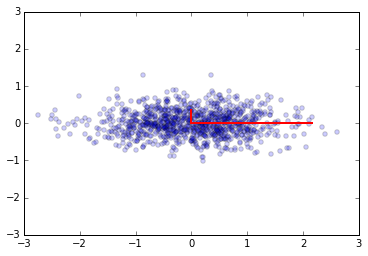

In [17]:
plt.scatter(ys[0,:], ys[1,:], alpha=0.2)
for e_, v_ in zip(e1, np.eye(2)):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

For example, if we only use the first column of `ys`, we will have the projection of the data onto the first principal component, capturing the majoriyt of the variance in the data with a single featrue that is a linear combination of the original features.

#### Transform back to original coordinates

We may need to transform the (reduced) data set to the original feature coordinates for interpreation. This is simply another linear transform (matrix multiplication).

In [18]:
zs = np.dot(v1, ys)

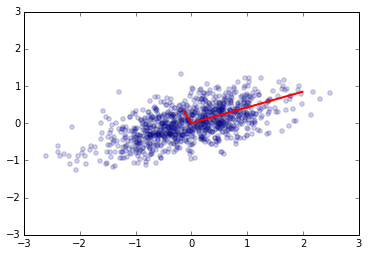

In [19]:
plt.scatter(zs[0,:], zs[1,:], alpha=0.2)
for e_, v_ in zip(e1, v1.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

In [20]:
u, s, v = np.linalg.svd(x)
u.dot(u.T)

array([[ 1.,  0.],
       [ 0.,  1.]])

Dimension reduction via PCA
----

We have the sepctral decomposition of the covariance matrix

$$
A = Q^{-1}\Lambda Q
$$

Suppose $\Lambda$ is a rank $p$ matrix. To reduce the dimensionality to $k \le p$, we simply set all but the first $k$ values of the diagonal of $\Lambda$ to zero. This is equivvalent to ignoring all except the first $k$ principal componnents.

What does this achieve? Recall that $A$ is a covariance matrix, and the trace of the matrix is the overall variability, since it is the sum of the variances.

In [21]:
A

array([[ 0.628 ,  0.2174],
       [ 0.2174,  0.2083]])

In [22]:
A.trace()

0.8364

In [23]:
e, v = np.linalg.eig(A)
D = np.diag(e)
D

array([[ 0.7203,  0.    ],
       [ 0.    ,  0.116 ]])

In [24]:
D.trace()

0.8364

In [25]:
D[0,0]/D.trace()

0.8612

Since the trace is invariant under change of basis, the total variability is also unchaged by PCA. By keeping only the first $k$ principal components, we can still "explain" $\sum_{i=1}^k e[i]/\sum{e}$ of the total variability. Sometimes, the degree of dimension reduction is specified as keeping enough principal components so that (say) $90\%$ fo the total variability is exlained.

## Using Singular Value Decomposition (SVD) for PCA

SVD is a decomposition of the data matrix $X = U S V^T$ where $U$ and $V$ are orthogonal matrices and $S$ is a diagnonal matrix. 

Recall that the transpose of an orthogonal matrix is also its inverse, so if we multiply on the right by $X^T$, we get the follwoing simplification

\begin{align}
X &= U S V^T \\
X X^T &= U S V^T (U S V^T)^T \\
 &= U S V^T V S U^T \\
 &= U S^2 U^T
\end{align}

Compare with the eigendecomposition of a matrix $A = W \Lambda W^{-1}$, we see that SVD gives us the eigendecomposition of the matrix $XX^T$, which as we have just seen, is basically a scaled version of the covariance for a data matrix with zero mean, with the eigenvectors given by $U$ and eigenvealuse by $S^2$ (scaled by $n-1$)..


In [26]:
u, s, v = np.linalg.svd(x)

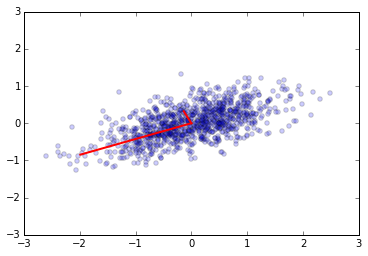

In [27]:
e2 = s**2/(n-1)
v2 = u
plt.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e2, v2):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

In [28]:
v1 # from eigenvectors of covariance matrix

array([[ 0.9205, -0.3909],
       [ 0.3909,  0.9205]])

In [29]:
v2 # from SVD

array([[-0.9205, -0.3909],
       [-0.3909,  0.9205]])

In [30]:
e1 # from eigenvalues of covariance matrix

array([ 0.7204,  0.1161])

In [31]:
e2 # from SVD

array([ 0.7204,  0.1161])

### <font color=red>Exercises</font>

The exercise is meant to help your understanding of what is going on when PCA is performed on a data set and how it can remove linear redundancy. You would normally use a library function to perform PCA to reduce the dimensionality of a real data set.

**1**. Create a data set of 100 3-vectors such that the first componnent $a_0 \sim N(0,1)$, $a_1 \sim a_0 + N(0,3)$ and $a_2 = 2a_0 + a_1$, where $N(\mu, \sigma)$ is the normal distribution with mean $\mu$ and standard deviaiton $\sigma$. The data set should be a $3 \times 100$ matrix. Normalzie so that the row means are 0.

In [32]:
a0 = np.random.normal(0, 1, 100)
a1 = a0 + np.random.normal(0, 3, 100)
a2 = 2*a0 + a1
A = np.row_stack([a0, a1, a2])
A = A - A.mean(0)
A.shape

(3, 100)

**2**. Find the eigenvecors ane eigenvalues of the coveriance matrix of the data set using spectral decomposition.

In [33]:
import scipy.linalg as la

M = np.cov(A)
e, v = la.eig(M)
idx = np.argsort(e)[::-1]
e = e[idx]
e = np.real_if_close(e)
v = v[:, idx]

print M
print e
print v

[[ 4.1765 -1.4026 -2.7739]
 [-1.4026  1.3427  0.0598]
 [-2.7739  0.0598  2.7141]]
[  6.5711e+00   1.6621e+00   8.2823e-16]
[[-0.7906  0.204   0.5774]
 [ 0.2186 -0.7867  0.5774]
 [ 0.572   0.5827  0.5774]]


**3**. Find the eigenvecors ane eigenvalues of the coveriance matrix of the data set using SVD. Cehck that they are equivalent to those found using spectral decomposition.

In [34]:
u, s, v = la.svd(A)
print s**2/(A.shape[1] - 1)
print u

[  6.5995e+00   1.6711e+00   3.4685e-31]
[[-0.7899  0.2066  0.5774]
 [ 0.2161 -0.7874  0.5774]
 [ 0.5739  0.5808  0.5774]]


**4**. What percent of the total variability is explained by the principal compoennts? Given how the dataset was constructed, do these make sense? Reduce the dimenisionality of the system so that over 99% of the total variability is retained.

In [35]:
print "Explained variance", np.cumsum(e)/e.sum()
# note: a2 is a linear combination of a1
# and a0 explains part of the variance of a1 by construction

u.dot(np.diag(e).dot(u.T))

B1 = u.T.dot(A) # in PCA coordinates

e[2:] = 0
A1 = u.dot(np.diag(e).dot(B1)) # in original coorindate with dimension reduction

Explained variance [ 0.7981  1.      1.    ]


**5**. Plot the data points in the origianla and PCA coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions. 

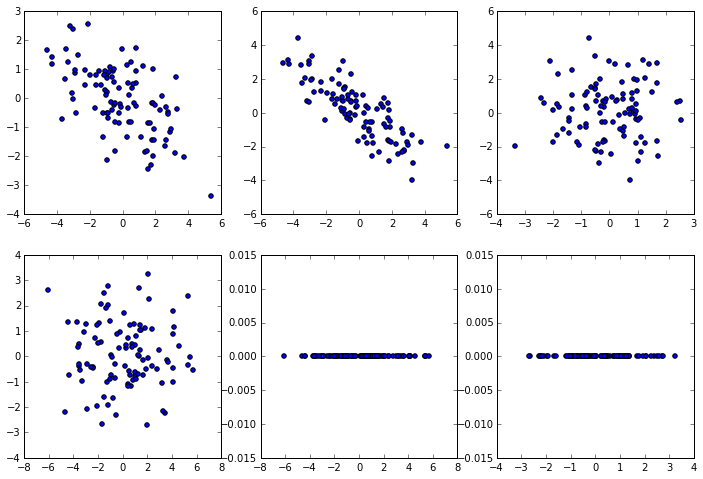

In [36]:
plt.figure(figsize=(12, 8))
dims = [(0,1), (0,2), (1,2)]
for k, dim in enumerate(dims):
    plt.subplot(2, 3, k+1)
    plt.scatter(A[dim[0], :], A[dim[1], :])
    plt.subplot(2, 3, k+4)
    plt.scatter(B1[dim[0], :], B1[dim[1], :])

**6**. Use the `decomposition.PCA()` function from the `sklearn` package to perfrom the decomposiiton. 

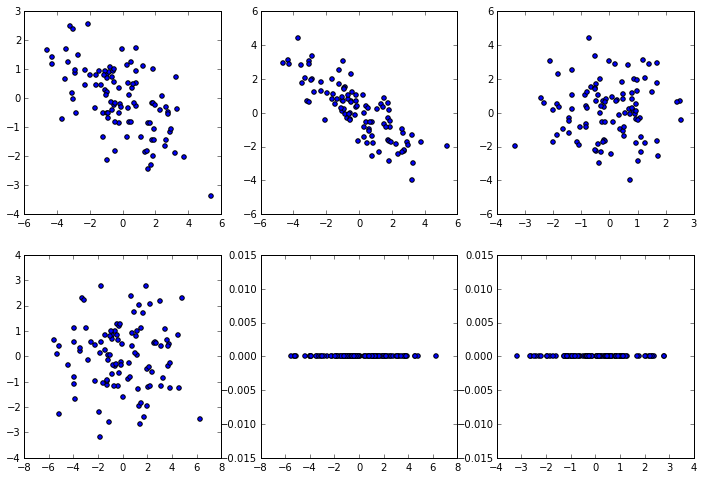

In [37]:
from sklearn.decomposition import PCA

pca = PCA(copy=True)
pca.fit(A.T)
B2 = pca.transform(A.T)
B2 = B2.T

plt.figure(figsize=(12, 8))
dims = [(0,1), (0,2), (1,2)]
for k, dim in enumerate(dims):
    plt.subplot(2, 3, k+1)
    plt.scatter(A[dim[0], :], A[dim[1], :])
    plt.subplot(2, 3, k+4)
    plt.scatter(B2[dim[0], :], B2[dim[1], :])